In [7]:
import pandas as pd
import numpy as np
import dataframe as df
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'dataframe'

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
   'font.size': 12,
   'grid.alpha': 0.25})

In [10]:
df = pd.read_csv("./neoplasms-breast-cancer.csv")
df

,Mean Annual Temperature,Mortality Index
0,51.3,102.5
1,49.9,104.5
2,50.0,100.4
3,49.2,95.9
4,48.5,87.0
5,47.8,95.0
6,47.3,88.6
7,45.1,89.2
8,46.3,78.9
9,42.1,84.6


In [11]:
temp_data = df["Mean Annual Temperature"].to_numpy()
mort_data = df["Mortality Index"].to_numpy()

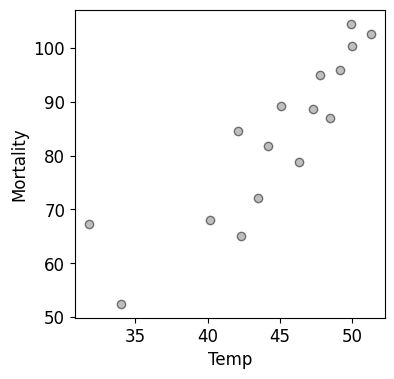

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(temp_data, mort_data, marker='o', linestyle="None", markersize=6,
      markerfacecolor="gray", markeredgecolor="k", alpha=.5)

ax.set_xlabel("Temp")
ax.set_ylabel("Mortality")

plt.show(fig)

In [12]:
import eda.resistantline as eda_rl

In [13]:
batches_dict = eda_rl.get_resistance_line(temp_data, mort_data, max_iter=100, tol=1e-6)

0 3.412371134020621 -70.18333333333344 -0.8729939419704565 40.875773195876405
1 2.5393771920501647 -70.18333333333344 0.6256468636631088 10.983924965458682
2 3.1650240557132734 -70.18333333333344 -0.4853985202929647 33.96242235718611
3 2.903831382632413 -70.18333333333344 -0.024359063870181004 24.486952726531047
4 2.891688631046216 -70.18333333333344 -0.002702403824692626 24.03706378026233
5 2.890031242715179 -70.18333333333344 0.0002535568069487286 23.975657542597478
6 2.8901734104046257 -46.202408477842056 0.0 -7.105427357601002e-15


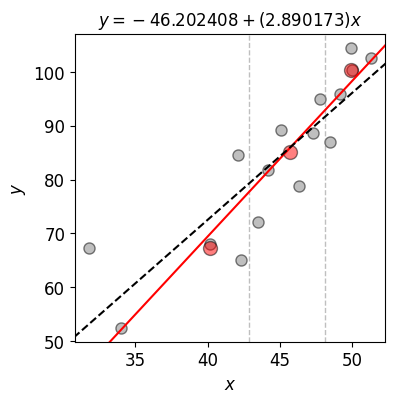

In [19]:
# batches_dict = eda_rl.get_resistant_line(temp_data, mort_data, max_iter=100, tol=1e-6)

final_slope, final_intercept = batches_dict[batches_dict["iter_max"]]["slope_intercept"]

A = np.vstack([temp_data, np.ones(len(temp_data))]).T
reg_line = np.linalg.lstsq(A, mort_data, rcond=None)[0]

eda_rl.plot_resistance_line(temp_data, mort_data, final_intercept, final_slope, reg_line)

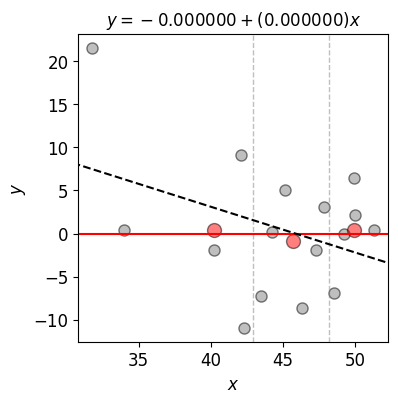

In [20]:
iter_max = batches_dict["iter_max"]
temp_data_residual = np.hstack(
  [batches_dict[iter_max]["residual_batches"][i]['x'] for i in range(3)])
mort_data_residual = np.hstack(
  [batches_dict[iter_max]["residual_batches"][i]['y'] for i in range(3)])

final_slope_residual, final_intercept_residual \
  = batches_dict[iter_max]["residual_slope_intercept"]

A = np.vstack([temp_data_residual, np.ones(len(temp_data_residual))]).T
reg_line = np.linalg.lstsq(A, mort_data_residual, rcond=None)[0]
eda_rl.plot_resistance_line(temp_data_residual, mort_data_residual, 
                            final_intercept_residual, final_slope_residual,
                            reg_line)

In [21]:
eda_rl.plot_3points(displace_data, mpg_data, x_label="disp", y_label="mpg")

NameError: name 'displace_data' is not defined